**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**July, 2023**

---

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import scipy
import matplotlib.pyplot as plt

import seaborn as sns

### Note 
To run this chunk you need:

*rpy2==3.4.2  ///  anndata2ri==1.0.6*

In [3]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [21]:
df1 = pd.read_csv('../results/SC_limma_Trophoblast_MAL_24h/1_DEGs_SC_MAL_24h_VCT_fusing.tsv', index_col=0,sep='\t')
df2 = pd.read_csv('../results/SC_limma_Trophoblast_MAL_24h/2_DEGs_SC_MAL_24h_VCT.tsv', index_col=0,sep='\t')

In [22]:
df1.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
MMP24OS,0.374704,5.726263,90.631744,1.225836e-09,0.000010,0.000010
PLCL2,-0.642508,8.091865,81.444066,3.386637e-09,0.000027,0.000011
CHST12,-0.731067,3.687117,79.693755,4.151929e-09,0.000033,0.000011
GPC3,-0.816194,7.174688,75.951308,6.495729e-09,0.000051,0.000013
GUK1,0.230347,7.289740,72.022147,1.058798e-08,0.000084,0.000017


In [23]:
df2.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
CCL3,1.994071,5.772547,155.362130,9.110064e-13,9.107330e-09,9.107330e-09
AC008591.1,-1.237636,5.891809,83.345779,8.910236e-10,8.907563e-06,4.453781e-06
SPP1,1.706711,5.689939,67.544276,7.463222e-09,7.460983e-05,2.486994e-05
ADAMTS19,-0.838103,7.674344,64.693015,1.137786e-08,1.137445e-04,2.843612e-05
HMGN2,0.439966,9.238759,60.852914,2.051519e-08,2.050904e-04,3.257878e-05


#  VCT_fusing

### Defining a thershold for significant Up reg in HBC

In [24]:
df1up= df1[(df1['logFC'] > 0) ]
df1_down= df1[(df1['logFC'] < 0) ]

In [25]:
df1_down

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
PLCL2,-0.642508,8.091865,8.144407e+01,3.386637e-09,0.000027,0.000011
CHST12,-0.731067,3.687117,7.969376e+01,4.151929e-09,0.000033,0.000011
GPC3,-0.816194,7.174688,7.595131e+01,6.495729e-09,0.000051,0.000013
GSPT1,-0.322199,6.972590,6.379366e+01,3.157167e-08,0.000250,0.000035
AC109492.1,-0.690933,4.215837,6.449167e+01,2.866338e-08,0.000227,0.000035
...,...,...,...,...,...,...
MRPL47,-0.000194,6.219770,2.801000e-05,9.958208e-01,1.000000,0.997584
MED10,-0.000189,5.741185,1.235881e-05,9.972240e-01,1.000000,0.998485
RPS6KB2,-0.000131,4.870721,6.327240e-06,9.980137e-01,1.000000,0.998774
BICD2,-0.000249,3.448080,6.302621e-06,9.980176e-01,1.000000,0.998774


In [27]:
df1_temp = pd.concat([df1up, df1_down])

In [9]:
%%R

library(Cairo)
library(ggplot2)
library(ggrepel)
library(EnhancedVolcano)
library(magrittr)

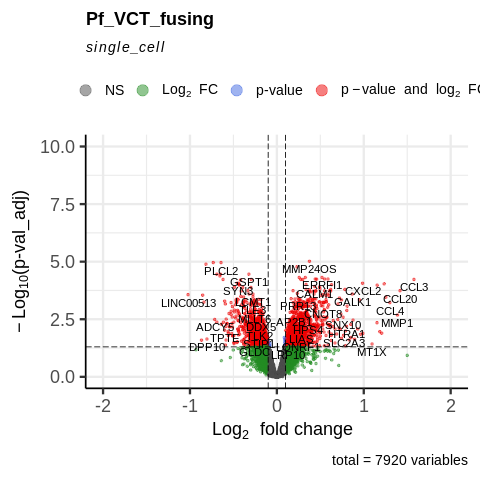

In [28]:
%%R -i df1_temp

EnhancedVolcano(df1_temp, lab = rownames(df1_temp), x="logFC", y="p_val_adj",  
                #selectLab = c('CXCL8','IL1B'),
                
                pCutoff=0.05,
                FCcutoff = 0.1, title = "Pf_VCT_fusing", subtitle = bquote(italic(single_cell)), 
                ylab = bquote(-Log[10] * "(p-val_adj)"), xlim = c(-2, 2), pointSize =1,
                labSize = 4)
#ggsave("volcano_plot_Pf_VCT_fusing_SN_day2.eps",  device=cairo_ps, width =7,   height =7)




In [29]:
x= df1_temp[(df1_temp['p_val_adj'] < 0.05) ]

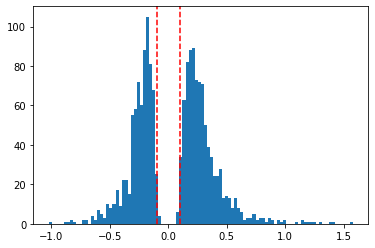

In [30]:
plt.hist(x['logFC'], bins = 100)
plt.axvline(0.1, linestyle = '--', color = 'red')
plt.axvline(-0.1, linestyle = '--', color = 'red')

## Note:
Save DEGs list:

    p_val_adj < 0.05
    
    avg_log2FC > 0.1
    
    ==> Input to metascape

### Significant Up reg in HBC

In [53]:
upDEG= df1[(df1['p_val_adj'] < 0.05) & (df1['logFC'] > 0.1)]

In [54]:
upDEG.to_csv('../results/SC_limma_Trophoblast_MAL_24h/1_DEGs_UP_SC_MAL_24h_VCTfusing.tsv', index=True, sep='\t')

In [55]:
upDEG.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
MMP24OS,0.374704,5.726263,90.631744,1.225836e-09,0.000010,0.000010
GUK1,0.230347,7.289740,72.022147,1.058798e-08,0.000084,0.000017
ERRFI1,0.519455,8.211099,58.491610,6.755355e-08,0.000535,0.000049
NFKBIZ,0.328492,5.681678,58.968408,6.296046e-08,0.000499,0.000049
ATOX1,0.257473,6.586556,57.898700,7.377820e-08,0.000584,0.000049


In [56]:
upDEG.shape

(883, 6)

In [57]:
list(upDEG.index)

['MMP24OS',
 'GUK1',
 'ERRFI1',
 'NFKBIZ',
 'ATOX1',
 'RTL8C',
 'MTSS2',
 'DMD',
 'ZFP36',
 'HMGN2',
 'ABI1',
 'CCL3',
 'CXCL2',
 'CXCL3',
 'ADM',
 'BHLHE40',
 'IL1B',
 'CALM1',
 'RPS27L',
 'MIIP',
 'PHPT1',
 'TLR3',
 'NEK6',
 'TMSB10',
 'MYL6',
 'PJA2',
 'CSTB',
 'NAMPT',
 'CCL20',
 'HILPDA',
 'PSMB10',
 'SPICE1',
 'SERTAD1',
 'ARRDC3',
 'DARS',
 'TMEM263',
 'NFKB2',
 'GALK1',
 'PRKD3',
 'FTH1',
 'PHF21A',
 'GPR137B',
 'CXCL8',
 'PRR13',
 'OPTN',
 'HMGB2',
 'NFYA',
 'GABARAP',
 'DPEP2',
 'FGD6',
 'SNX25',
 'EFHD1',
 'AZI2',
 'C4orf3',
 'FAM120AOS',
 'PRG2',
 'GNAI2',
 'C11orf68',
 'COG6',
 'NBN',
 'ZCCHC2',
 'ANKRD13A',
 'ZBTB21',
 'DUSP11',
 'TMEM265',
 'BNIP3L',
 'PPP1R3B',
 'B2M',
 'RLIM',
 'CRIM1-DT',
 'SLC35A3',
 'SLC25A37',
 'BCL2L1',
 'WASF2',
 'ISG20',
 'AGTRAP',
 'AC027644.3',
 'CRYBG3',
 'GLG1',
 'CCL4',
 'UBC',
 'DDAH2',
 'CRKL',
 'TICAM1',
 'JUP',
 'PPP1R15A',
 'GLMP',
 'YEATS2',
 'CHIC2',
 'SF3B1',
 'SBF2',
 'S100A4',
 'CAPN6',
 'TMEM165',
 'TNIP1',
 'LRRFIP2',
 'CORO1C',

In [18]:
#upDEG.loc[['CD44','P4HB','IL6','CSF3','CD47','DLK1']]

### Significant Down reg in VCT_fusing

In [66]:
downDEG= df1[(df1['p_val_adj'] < 0.05) & (df1['logFC'] < -0.1)]

In [64]:
downDEG

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
PLCL2,-0.642508,8.091865,81.444066,3.386637e-09,0.000027,0.000011
CHST12,-0.731067,3.687117,79.693755,4.151929e-09,0.000033,0.000011
GPC3,-0.816194,7.174688,75.951308,6.495729e-09,0.000051,0.000013
GSPT1,-0.322199,6.972590,63.793658,3.157167e-08,0.000250,0.000035
AC109492.1,-0.690933,4.215837,64.491671,2.866338e-08,0.000227,0.000035
...,...,...,...,...,...,...
PUS1,-0.315698,3.294672,14.396836,8.800146e-04,1.000000,0.009574
UTP15,-0.370895,3.051509,14.336230,8.978743e-04,1.000000,0.009728
GLRX3,-0.166549,6.690893,14.338684,8.971437e-04,1.000000,0.009728
TEAD1,-0.190658,7.003750,14.299522,9.088834e-04,1.000000,0.009807


In [36]:
downDEG.to_csv('../results/SC_limma_Trophoblast_MAL_24h/1_DEGs_DOWN_SC_MAL_24h_VCTfusing.tsv', index=True, sep='\t')

In [37]:
downDEG.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
PLCL2,-0.642508,8.091865,81.444066,3.386637e-09,0.000027,0.000011
CHST12,-0.731067,3.687117,79.693755,4.151929e-09,0.000033,0.000011
GPC3,-0.816194,7.174688,75.951308,6.495729e-09,0.000051,0.000013
GSPT1,-0.322199,6.972590,63.793658,3.157167e-08,0.000250,0.000035
AC109492.1,-0.690933,4.215837,64.491671,2.866338e-08,0.000227,0.000035


In [67]:
downDEG.shape

(750, 6)

In [68]:
list(downDEG.index)

['PLCL2',
 'CHST12',
 'GPC3',
 'GSPT1',
 'AC109492.1',
 'ARHGAP23',
 'DYNC2H1',
 'AC004160.1',
 'C1GALT1',
 'FASN',
 'SYN3',
 'CEBPA',
 'ACE2',
 'FP236383.3',
 'GNE',
 'EPHB4',
 'SYT7',
 'SLC13A4',
 'C15orf41',
 'LCMT1',
 'SEMA6A-AS1',
 'LINC00513',
 'AC016831.7',
 'IMPA2',
 'FAM133B',
 'AC015987.1',
 'RCC2',
 'PITPNB',
 'AL590822.2',
 'PTPN11',
 'REXO2',
 'AC107068.2',
 'PHLDA2',
 'UBALD2',
 'NAA25',
 'BCAR4',
 'NUTM2B-AS1',
 'SLC22A18AS',
 'TMEM33',
 'SH3BGRL2',
 'LMO2',
 'PLCG1-AS1',
 'TLE3',
 'AL162253.2',
 'EEA1',
 'ENTPD1-AS1',
 'CDKN1C',
 'C1QTNF1',
 'THSD7A',
 'RNASEH1',
 'PPP2R5E',
 'GATC',
 'ACSS1',
 'MAPK10',
 'MICALL1',
 'AC099329.1',
 'PAK1',
 'LINC01619',
 'PHYHIPL',
 'DHX37',
 'AP1AR',
 'LINC01820',
 'EXOC6B',
 'ARL5A',
 'CSF3R',
 'AC004231.1',
 'FAM135A',
 'TEAD3',
 'TMEM184A',
 'TP53RK',
 'MAFK',
 'GSE1',
 'TMX1',
 'SFPQ',
 'ASTN2',
 'CD46',
 'MPP1',
 'RAP2C-AS1',
 'GTF2F2',
 'MLLT6',
 'FNBP4',
 'OMG',
 'LUC7L3',
 'AC015923.1',
 'SSB',
 'UBE2A',
 'DDX39A',
 'EEFSEC',
 

In [22]:
#temp= pd.read_table('../results/SC_Immune_MAL_24h/1_DEGs_DOWN_SC_MAL_24h_HBC.tsv', index_col=0)
#list(temp.index)

#  VCT

### Significant Up reg in PAMM1

In [38]:
upDEG= df2[(df2['p_val_adj'] < 0.05) & (df2['logFC'] > 0.1)]

In [39]:
upDEG.to_csv('../results/SC_limma_Trophoblast_MAL_24h/2_DEGs_UP_SC_MAL_24h_VCT.tsv', index=True, sep='\t')

In [40]:
upDEG.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
CCL3,1.994071,5.772547,155.362130,9.110064e-13,9.107330e-09,9.107330e-09
SPP1,1.706711,5.689939,67.544276,7.463222e-09,7.460983e-05,2.486994e-05
HMGN2,0.439966,9.238759,60.852914,2.051519e-08,2.050904e-04,3.257878e-05
TMEM265,0.727250,5.965756,60.179202,2.281199e-08,2.280514e-04,3.257878e-05
CCL20,1.452804,5.077363,54.852381,5.443452e-08,5.441819e-04,6.802274e-05


In [42]:
upDEG.shape

(432, 6)

In [44]:
list(upDEG.index)

['CCL3',
 'SPP1',
 'HMGN2',
 'TMEM265',
 'CCL20',
 'NAV2',
 'UBC',
 'ARRDC3',
 'CCL4',
 'WASF2',
 'COPB1',
 'LITAF',
 'SRGN',
 'RHOV',
 'TNFRSF12A',
 'STX12',
 'PALLD',
 'LASP1',
 'EGFR',
 'CXCL1',
 'BCL2A1',
 'ACBD3',
 'RAB11A',
 'PTGS2',
 'HEATR5A',
 'PJA2',
 'TNFAIP6',
 'FXR1',
 'TYROBP',
 'IER3',
 'SQSTM1',
 'SIPA1L2',
 'FTX',
 'EFHD1',
 'CCL3L1',
 'FAM120AOS',
 'AC025580.2',
 'LRRFIP2',
 'CDKN2A',
 'JUP',
 'SKAP2',
 'CCDC186',
 'DDX60L',
 'RASGEF1B',
 'COG6',
 'S100A8',
 'LIMA1',
 'C15orf48',
 'IFITM3',
 'MMP24OS',
 'GABARAPL1',
 'NFKB2',
 'GBP2',
 'ARHGAP5',
 'SOD3',
 'RAC1',
 'PRRC1',
 'DLK1',
 'MYL6',
 'FAM177A1',
 'RYBP',
 'IL1B',
 'MMP1',
 'GLCCI1',
 'CCDC18-AS1',
 'LMNA',
 'MCEE',
 'PPFIBP1',
 'CALD1',
 'FTH1',
 'RPS27L',
 'TJP3',
 'GRAMD2B',
 'EPAS1',
 'KLHL7',
 'N4BP2L2',
 'ZFAND2A',
 'GALK1',
 'CTNND1',
 'CLDN1',
 'NECAP2',
 'LGALS1',
 'PRSS8',
 'CXCL8',
 'PLAUR',
 'KLF5',
 'C4orf3',
 'NDEL1',
 'MAB21L3',
 'MAP1S',
 'GORASP2',
 'PLIN3',
 'AMMECR1',
 'PPIL4',
 'ITM2B',
 'R

### Significant Down reg in VCT

In [45]:
downDEG= df2[(df2['p_val_adj'] < 0.05) & (df2['logFC'] < -0.1)]

In [46]:
downDEG.to_csv('../results/SC_limma_Trophoblast_MAL_24h/2_DEGs_DOWN_SC_MAL_24h_VCT.tsv', index=True, sep='\t')

In [47]:
downDEG.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
AC008591.1,-1.237636,5.891809,83.345779,8.910236e-10,0.000009,0.000004
ADAMTS19,-0.838103,7.674344,64.693015,1.137786e-08,0.000114,0.000028
CCNE1,-0.732893,7.068451,61.826002,1.762542e-08,0.000176,0.000033
MPP1,-0.467337,6.450205,52.181643,8.605997e-08,0.000860,0.000096
MVB12B,-0.529313,5.486450,49.537404,1.376033e-07,0.001376,0.000129


In [51]:
downDEG.shape

(320, 6)

In [52]:
list(downDEG.index)

['AC008591.1',
 'ADAMTS19',
 'CCNE1',
 'MPP1',
 'MVB12B',
 'GJA5',
 'AC015923.1',
 'GRAMD1B',
 'PPM1H',
 'DGKD',
 'CRYL1',
 'BLVRA',
 'NFYB',
 'LRP2',
 'SSH2',
 'MEST',
 'ARRB1',
 'DISC1',
 'COA1',
 'GSE1',
 'HNRNPAB',
 'SEPTIN9',
 'ILDR1',
 'NAALADL2',
 'SLC44A1',
 'FP236383.3',
 'IPCEF1',
 'ZNF730',
 'GPSM2',
 'TFAM',
 'NRXN3',
 'GPC3',
 'ZNF66',
 'EZH2',
 'ARL6IP5',
 'SOX4',
 'UBE4B',
 'TFDP1',
 'PCOLCE2',
 'SLC13A4',
 'CDH12',
 'TCAF2',
 'BCL2L14',
 'TOMM5',
 'AL110292.1',
 'FAF1',
 'SPG21',
 'ABCG1',
 'GLDC',
 'DTYMK',
 'L1TD1',
 'HS6ST2',
 'NFIB',
 'MXD4',
 'SRSF5',
 'PPARD',
 'LINC02484',
 'AC007846.1',
 'SMAGP',
 'FRY',
 'ADCY2',
 'INSYN2A',
 'DKC1',
 'HPGD',
 'PCNX4',
 'CDK4',
 'SEMA6D',
 'REV3L',
 'TRMT10C',
 'ALDH5A1',
 'UTRN',
 'ENOX2',
 'USP3-AS1',
 'SLC17A5',
 'AL136171.2',
 'MAN1A2',
 'AL161772.1',
 'NLGN4X',
 'GSPT1',
 'EVC2',
 'SLC16A12',
 'PRTG',
 'EPB41L3',
 'ASTN2',
 'IVD',
 'ENTR1',
 'CKS2',
 'ARHGAP23',
 'EEF1E1',
 'TLE5',
 'UBALD2',
 'MARCH3',
 'RANBP9',
 'ACACA'